In [5]:
import pandas as pd
import numpy as np
import re
from os import path, getcwd
from nltk.corpus import stopwords
from PIL import Image
import wordcloud as WordCloud
from wordcloud import ImageColorGenerator
stopwords


<WordListCorpusReader in 'C:\\Users\\Shani Fisher\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [9]:
maps=pd.read_csv('Google_maps_new.csv')

In [10]:
maps.head()

,Date,Reviews,Username,Stars,Helpful
0,4-Aug-18,Trying to do too much. Every time I turn aroun...,John T. Hayner,Rated 1 stars out of five stars,270.0
1,3-Aug-18,The latest update allows you to not only share...,Kaelin Slape,Rated 5 stars out of five stars,76.0
2,7-Aug-18,"In the past I've had Garmin, Navman and TomTom...",paul herrett,Rated 5 stars out of five stars,1.0
3,7-Aug-18,Please add options for people to be able to fi...,A Google user,Rated 4 stars out of five stars,68.0
4,6-Aug-18,"I have seceral other apps on my phone, includi...",Marcelo de Moraes Leite,Rated 2 stars out of five stars,12.0


In [11]:
type(maps['Reviews'])

pandas.core.series.Series

In [12]:
maps['Reviews'][7]

'The routing will consistently take you a slower way every time, taking random rurns that make no sense. Update: this app has gotten even more garbage, it is worthless to me and ends up taking more time than anything. Download Waze and stop supporting the monopoly that is Google.'

In [14]:
maps['Reviews']=list(map(lambda x : str(x) ,maps['Reviews']))
maps['Reviews'] = maps['Reviews'].apply(lambda x: re.sub('\nFull Review*', '', x))
maps['Reviews'] = maps['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
maps['Reviews'] = maps['Reviews'].apply(lambda x: re.sub('\s+', ' ', x))
maps = maps.loc[maps['Reviews'] != ""]
#df = df.loc[df['selftext'] != ""]
maps['Reviews'] = maps['Reviews'].apply(lambda x: re.sub('[^\w\s]', '', x))
maps['Reviews']

0       trying to do too much every time i turn around...
1       the latest update allows you to not only share...
2       in the past ive had garmin navman and tomtom s...
3       please add options for people to be able to fi...
4       i have seceral other apps on my phone includin...
5       for more than two years if i use gps then turn...
6       this app was very good last year but as a driv...
7       the routing will consistently take you a slowe...
8       when i select directions on a location the app...
9       again after using it found nothing great you h...
10      1 i was taking a long trip and it suggested al...
11      please add a search option for my contribution...
12      i use it regularly and within city limits i fe...
13      this samsung 7 is sctually my sanchos blancobo...
14      if i want to go to a park take me to the enter...
15      use it solely very good app except few wrong a...
16      the best app google has ever made and one of t...
17      consta

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
extra=['app', 'maps']
stop = stop + extra
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
maps['Reviews'] = maps['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [75]:
d = getcwd()
mask = np.array(Image.open(path.join(d, "google maps.jpg")))

In [76]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=1000, mask=mask, max_font_size=90, random_state=42)
# generate word cloud
#wc.generate(''.join(waze['Reviews']))
image_colors = ImageColorGenerator(mask)
wc.generate(''.join(maps['Reviews']))

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

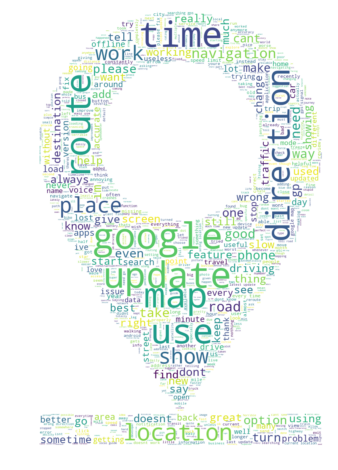

In [77]:
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
#plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.axis("off")
plt.show()
#plt.savefig('image.png')

In [68]:
d = getcwd()
mask = np.array(Image.open(path.join(d, "fiver.jpg")))

In [69]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=1000, mask=mask, max_font_size=90, random_state=42)
# generate word cloud
#wc.generate(''.join(waze['Reviews']))
image_colors = ImageColorGenerator(mask)
wc.generate(''.join(maps[maps.Stars=='Rated 5 stars out of five stars']['Reviews']))

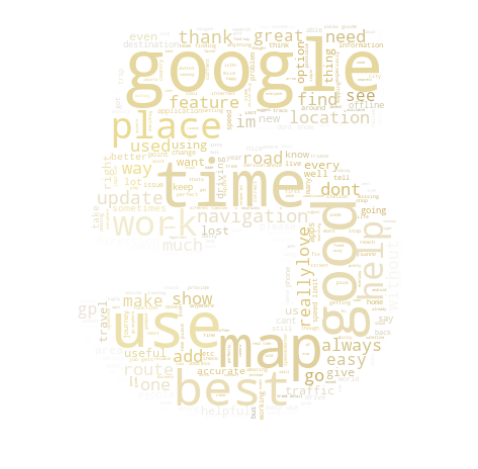

In [70]:
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.axis("off")
plt.show()
#plt.savefig('image.png')

In [52]:
d = getcwd()
mask = np.array(Image.open(path.join(d, "four4.jfif")))

In [53]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=1000, mask=mask, max_font_size=90, random_state=42)
# generate word cloud
#wc.generate(''.join(waze['Reviews']))
image_colors = ImageColorGenerator(mask)
wc.generate(''.join(maps[maps.Stars=='Rated 4 stars out of five stars']['Reviews']))

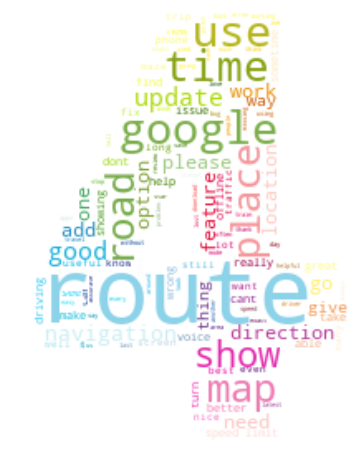

In [55]:
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.axis("off")
plt.show()
#plt.savefig('image.png')

In [29]:
d = getcwd()
mask = np.array(Image.open(path.join(d, "Three.png")))

In [30]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=1000, mask=mask, max_font_size=90, random_state=42)
# generate word cloud
#wc.generate(''.join(waze['Reviews']))
image_colors = ImageColorGenerator(mask)
wc.generate(''.join(maps[maps.Stars=='Rated 3 stars out of five stars']['Reviews']))

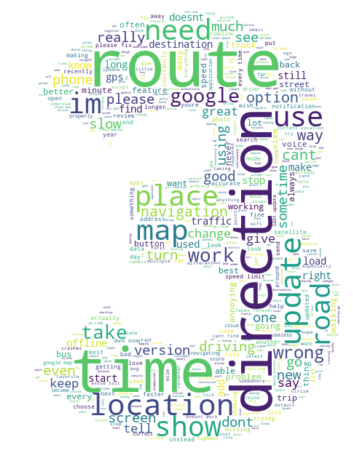

In [31]:
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
#plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.axis("off")
plt.show()
#plt.savefig('image.png')

In [48]:
d = getcwd()
mask = np.array(Image.open(path.join(d, "2.jpg")))

In [49]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=1000, mask=mask, max_font_size=90, random_state=42)
# generate word cloud
#wc.generate(''.join(waze['Reviews']))
image_colors = ImageColorGenerator(mask)
wc.generate(''.join(maps[maps.Stars=='Rated 2 stars out of five stars']['Reviews']))

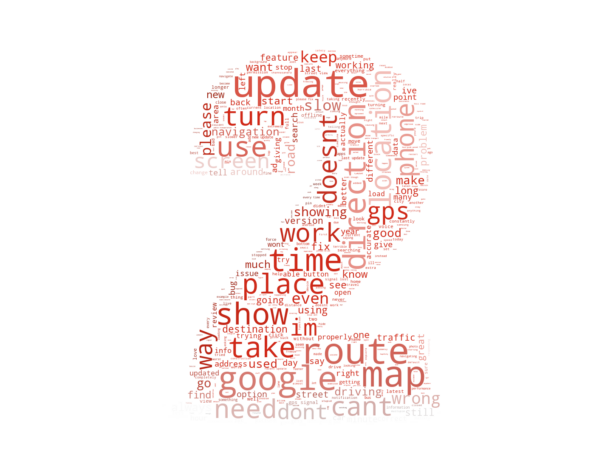

In [50]:
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.axis("off")
plt.show()
#plt.savefig('image.png')

In [56]:
d = getcwd()
mask = np.array(Image.open(path.join(d, "oneone.png")))

In [57]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=1000, mask=mask, max_font_size=90, random_state=42)
# generate word cloud
#wc.generate(''.join(waze['Reviews']))
image_colors = ImageColorGenerator(mask)
wc.generate(''.join(maps[maps.Stars=='Rated 1 stars out of five stars']['Reviews']))

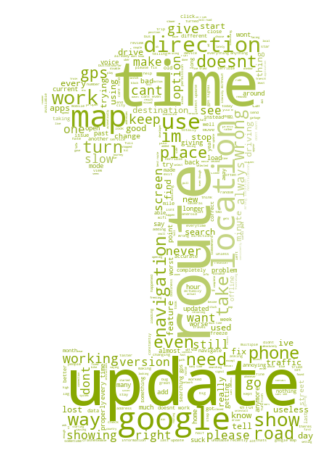

In [58]:
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.axis("off")
plt.show()
#plt.savefig('image.png')